# Linear Regression Plots
### Read in features and labels
### Plot features against each other
### Plot individual features against labels

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr

%matplotlib inline

In [2]:
# read in features and labels/examples (see build_features_labels2.ipynb for more info)
features = pd.read_csv('data_final/features.csv')
print features.shape
print features.columns
features[:10]

(314, 50)
Index([u'census_tract', u'bus_age', u'n_business', u'n_businesses_11',
       u'n_businesses_21', u'n_businesses_22', u'n_businesses_23',
       u'n_businesses_31', u'n_businesses_32', u'n_businesses_33',
       u'n_businesses_42', u'n_businesses_44', u'n_businesses_45',
       u'n_businesses_48', u'n_businesses_49', u'n_businesses_51',
       u'n_businesses_52', u'n_businesses_53', u'n_businesses_54',
       u'n_businesses_55', u'n_businesses_56', u'n_businesses_61',
       u'n_businesses_62', u'n_businesses_71', u'n_businesses_72',
       u'n_businesses_81', u'n_businesses_92', u'population',
       u'population_percent_male', u'population_percent_female', u'age_med',
       u'age_med_male', u'age_med_female', u'minor_percent', u'adult_percent',
       u'homes', u'homes_percent_mortgage', u'homes_percent_clear',
       u'homes_percent_rent', u'employment_percent', u'income_med',
       u'income_med_owner', u'income_med_renter', u'cost_med',
       u'cost_med_owner', u'cost_

,census_tract,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
0,100,0.541876,0.040244,0.25,0.0,0.0,0.027027,0.000000,0.000,0.006757,...,0.615612,0.499898,0.147354,0.513829,0.48075,0.9195,0.701031,0.592593,0.583333,0.000000
1,201,0.538251,0.055183,0.00,0.0,0.0,0.032432,0.000000,0.000,0.006757,...,0.566840,0.684250,0.227237,0.362798,0.56075,0.4870,0.701031,0.592593,0.583333,0.021766
2,202,0.541876,0.055793,0.25,0.0,0.0,0.054054,0.000000,0.000,0.000000,...,0.434022,0.417067,0.318495,0.422722,0.50650,0.7225,0.618557,0.617284,0.500000,0.059047
3,300,0.486091,0.150000,0.25,0.0,0.0,0.037838,0.058824,0.025,0.027027,...,0.356844,0.491126,0.270861,0.377983,0.57750,0.6410,0.835052,0.666667,0.690476,0.357875
4,400,0.516499,0.146037,0.00,0.0,0.0,0.021622,0.029412,0.000,0.006757,...,0.396237,0.347169,0.358638,0.352223,0.46750,0.6275,0.835052,0.666667,0.690476,0.234442
5,500,0.449023,0.061280,0.00,0.0,0.0,0.027027,0.058824,0.000,0.000000,...,0.317670,0.366111,0.265293,0.331887,0.45475,0.5725,0.814433,0.666667,0.797619,0.011336
6,600,0.387541,0.076220,0.00,0.0,0.0,0.027027,0.029412,0.000,0.000000,...,0.323496,0.349367,0.281653,0.329718,0.39675,0.5905,0.814433,0.666667,0.797619,0.006188
7,700,0.446434,0.064939,0.25,0.0,0.0,0.032432,0.058824,0.025,0.006757,...,0.399066,0.505572,0.327974,0.365239,0.60425,0.6205,0.835052,0.666667,0.690476,0.062528
8,800,0.360758,0.040549,0.00,0.0,0.0,0.016216,0.000000,0.000,0.006757,...,0.261325,0.401084,0.215931,0.296367,0.45200,0.5055,0.000000,0.000000,0.000000,0.007590
9,900,0.264131,0.071341,0.00,0.0,0.0,0.016216,0.088235,0.050,0.006757,...,0.266590,0.271528,0.229727,0.286334,0.45100,0.4975,0.814433,0.666667,0.797619,0.016920


## Look for correlated features

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


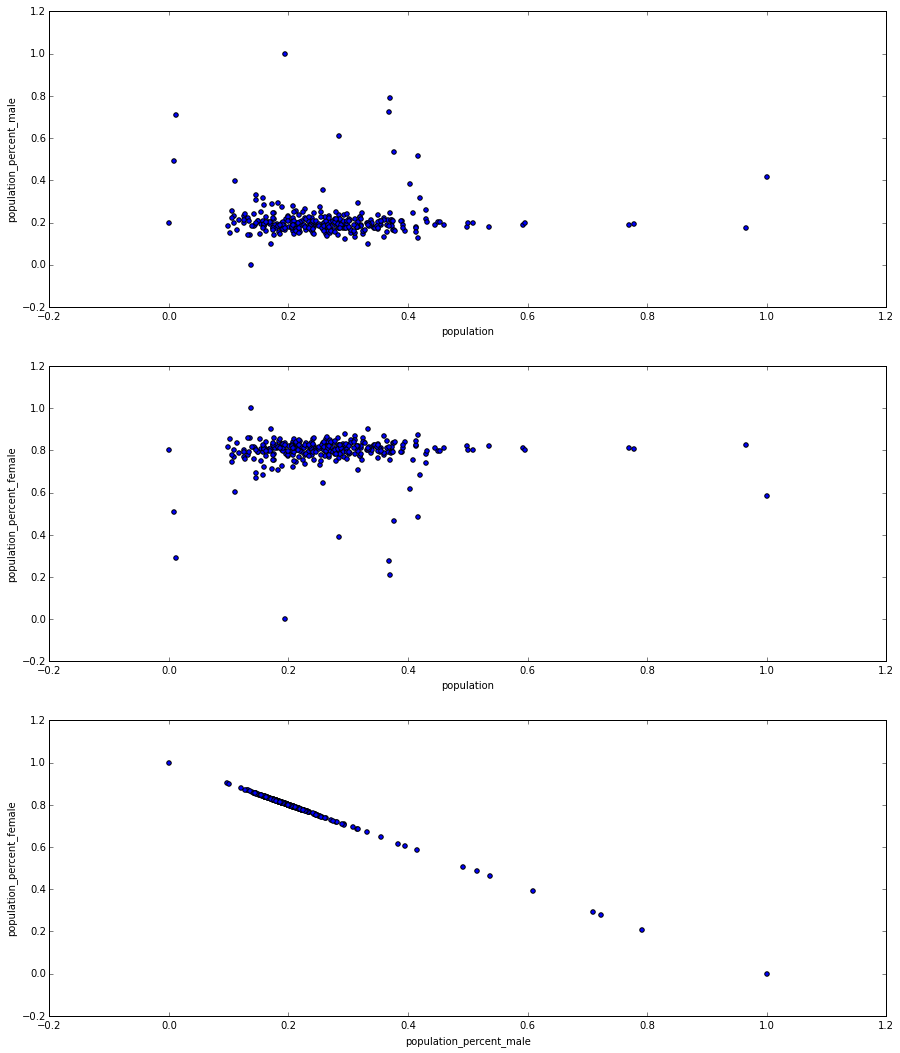

In [3]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='population', y='population_percent_male', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='population', y='population_percent_female', ax=axs[1])
features.plot(kind='scatter', x='population_percent_male', y='population_percent_female', ax=axs[2])

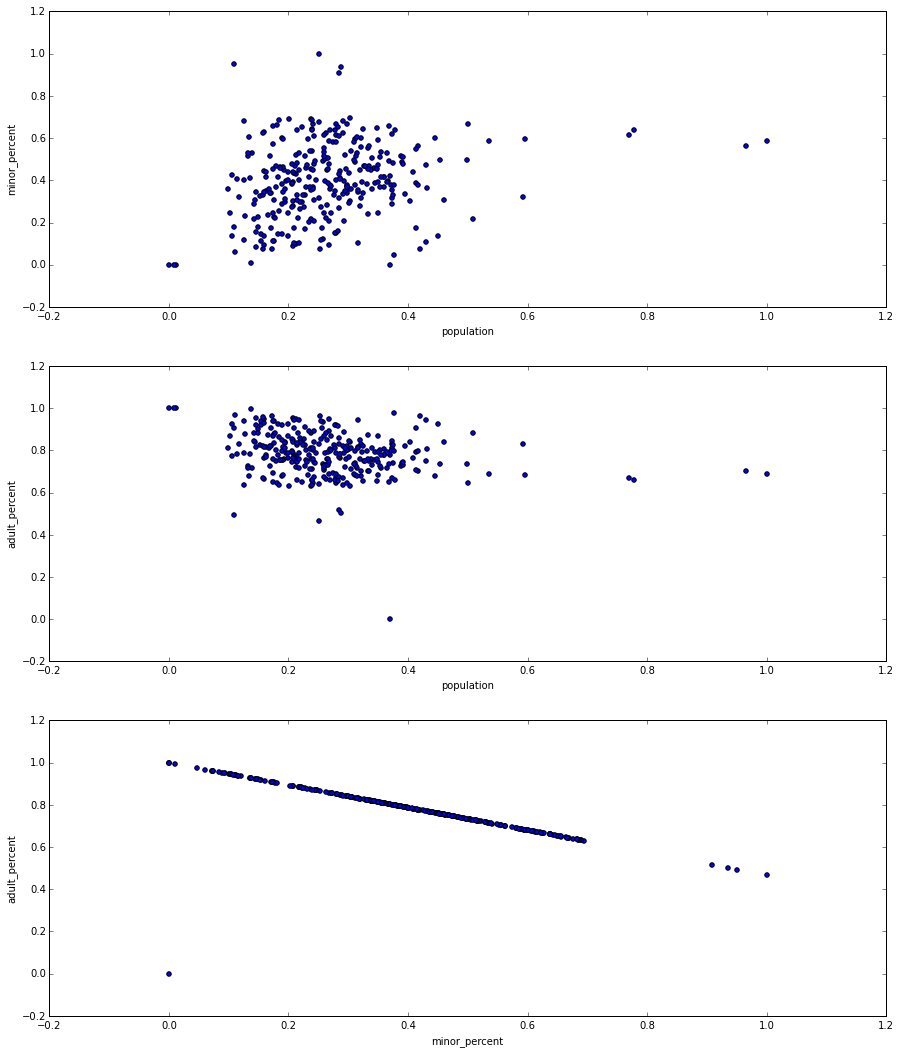

In [4]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='population', y='minor_percent', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='population', y='adult_percent', ax=axs[1])
features.plot(kind='scatter', x='minor_percent', y='adult_percent', ax=axs[2])

(0.98740634343047118, 6.5522747087192956e-252)
(0.98616964813675545, 1.3214691619984144e-245)
(0.94910183855863772, 1.3701352243360731e-158)


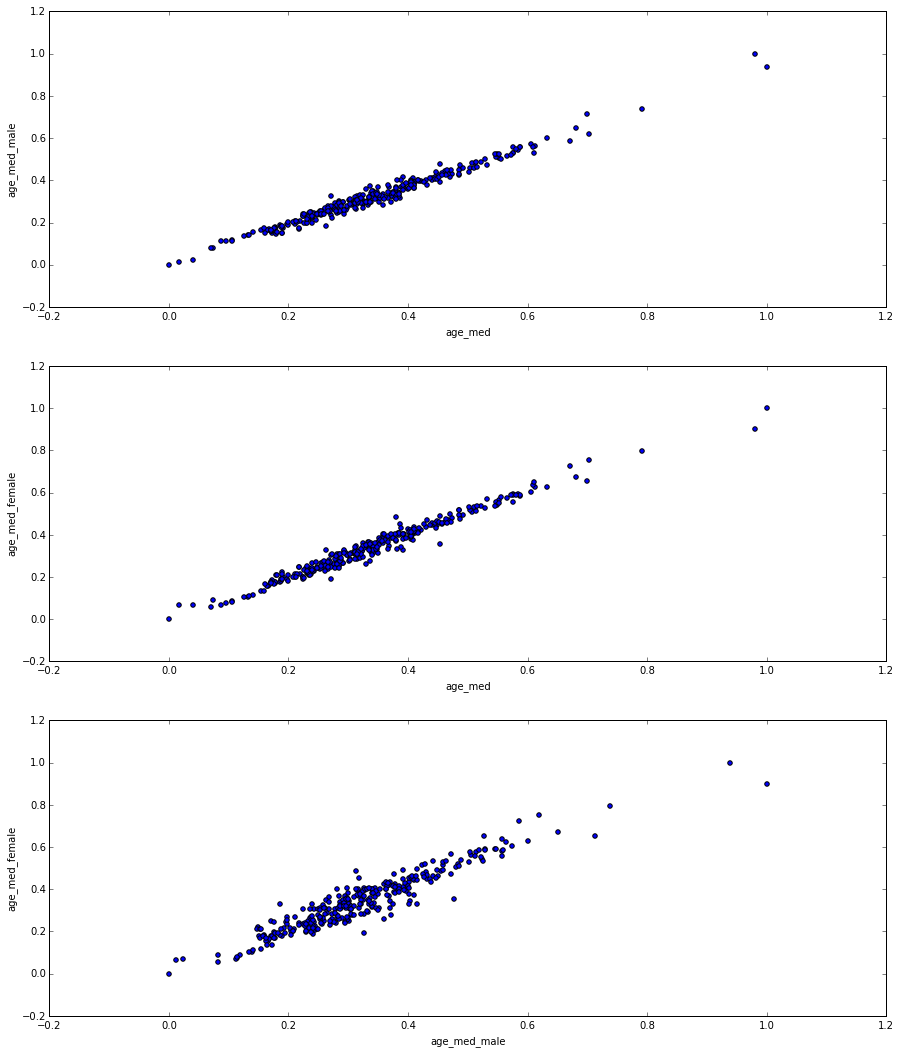

In [5]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='age_med', y='age_med_male', ax=axs[0], figsize=(15, 18))
# first value is the r-value, second is the p-value
print pearsonr(features.age_med,features.age_med_male)
features.plot(kind='scatter', x='age_med', y='age_med_female', ax=axs[1])
print pearsonr(features.age_med,features.age_med_female)
features.plot(kind='scatter', x='age_med_male', y='age_med_female', ax=axs[2])
print pearsonr(features.age_med_female,features.age_med_male)

(0.30601361801052224, 3.1251712186450032e-08)
(-0.90996791259916032, 2.6378546907706509e-121)
(-0.61178165589999245, 1.2626081680277716e-33)


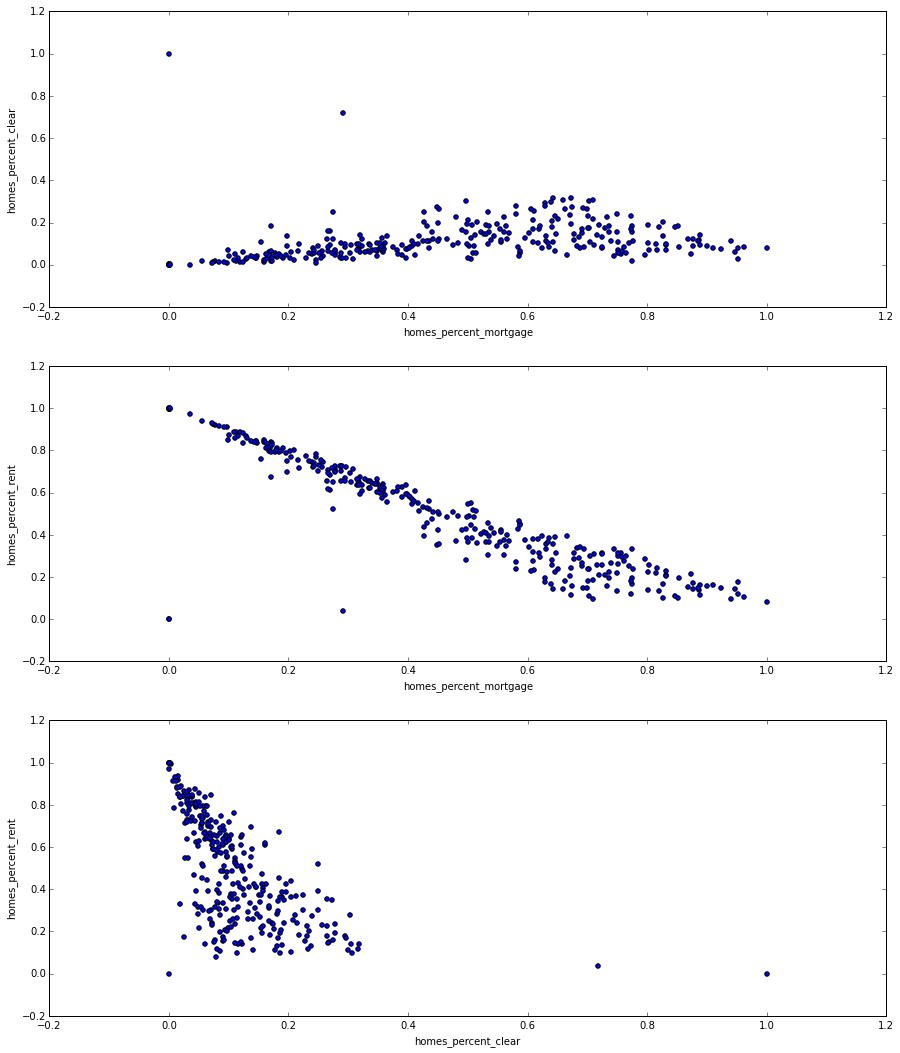

In [6]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='homes_percent_mortgage', y='homes_percent_clear', ax=axs[0], figsize=(15, 18))
print pearsonr(features.homes_percent_mortgage,features.homes_percent_clear)
features.plot(kind='scatter', x='homes_percent_mortgage', y='homes_percent_rent', ax=axs[1])
print pearsonr(features.homes_percent_mortgage,features.homes_percent_rent)
features.plot(kind='scatter', x='homes_percent_clear', y='homes_percent_rent', ax=axs[2])
print pearsonr(features.homes_percent_clear,features.homes_percent_rent)

(0.78328491781081733, 2.2328952171697822e-66)
(0.81895417385667846, 3.0745497331727006e-77)
(0.58995537201954507, 7.9222329379736642e-31)


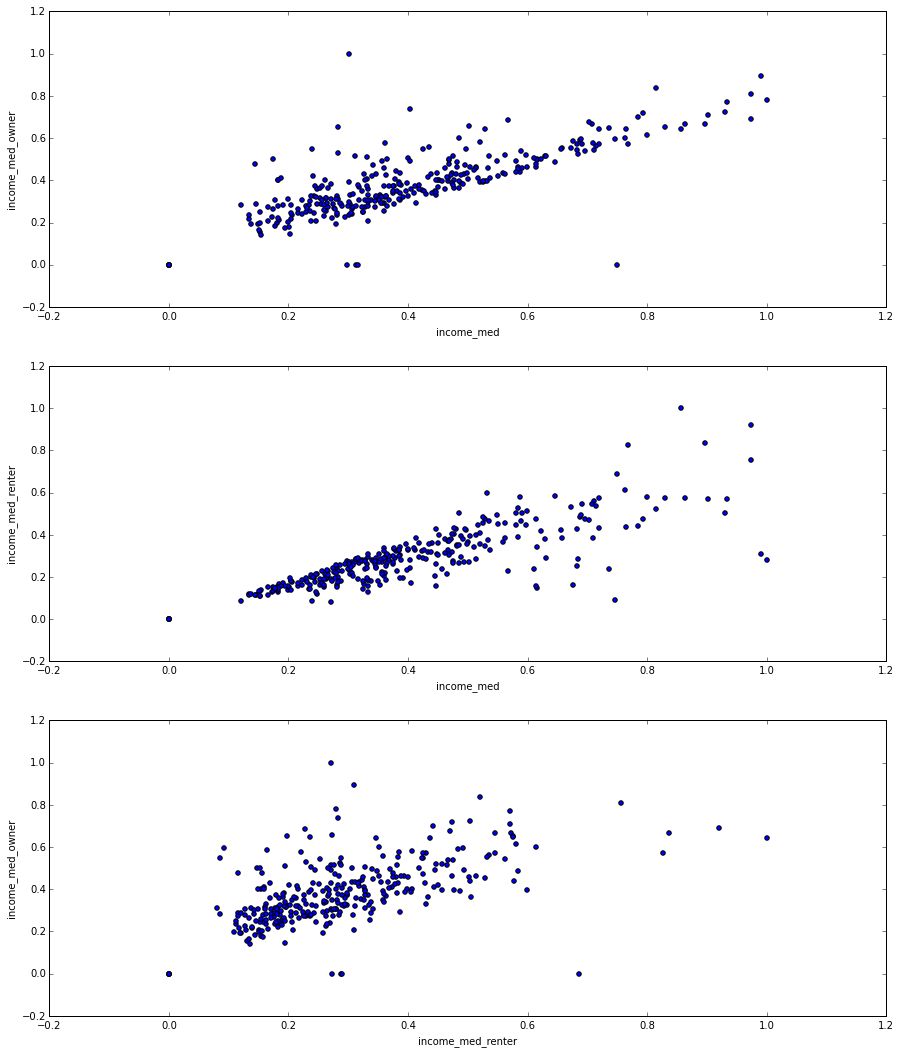

In [7]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='income_med', y='income_med_owner', ax=axs[0], figsize=(15, 18))
print pearsonr(features.income_med,features.income_med_owner)
features.plot(kind='scatter', x='income_med', y='income_med_renter', ax=axs[1])
print pearsonr(features.income_med,features.income_med_renter)
features.plot(kind='scatter', x='income_med_renter', y='income_med_owner', ax=axs[2])
print pearsonr(features.income_med_renter,features.income_med_owner)

(0.7276895135429986, 5.0820414069040754e-53)
(0.84659325766533022, 1.8704371662674589e-87)
(0.52984003196353002, 3.9994084262206345e-24)


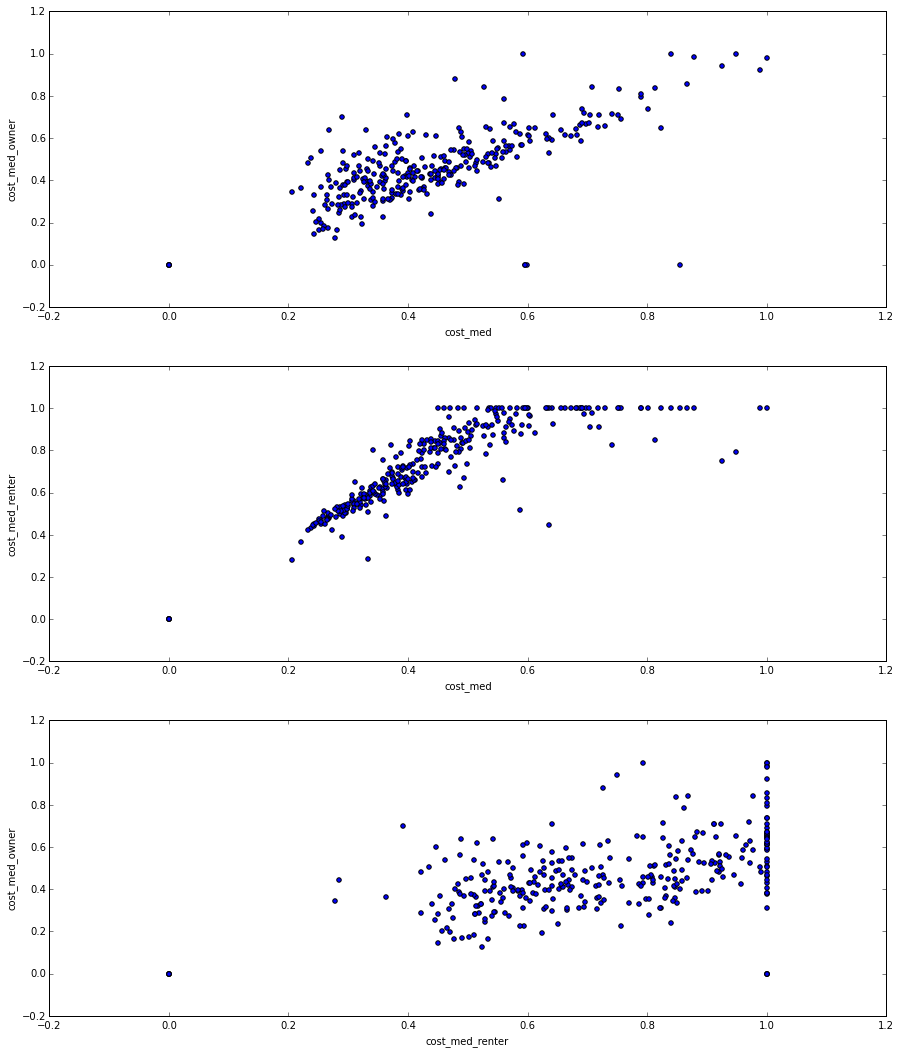

In [8]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='cost_med', y='cost_med_owner', ax=axs[0], figsize=(15, 18))
print pearsonr(features.cost_med,features.cost_med_owner)
features.plot(kind='scatter', x='cost_med', y='cost_med_renter', ax=axs[1])
print pearsonr(features.cost_med,features.cost_med_renter)
features.plot(kind='scatter', x='cost_med_renter', y='cost_med_owner', ax=axs[2])
print pearsonr(features.cost_med_renter,features.cost_med_owner)

(0.92813082732761121, 6.1465269190687674e-136)
(0.90912084295172546, 1.0618078425355541e-120)
(0.8336103168586404, 2.0163362563301657e-82)


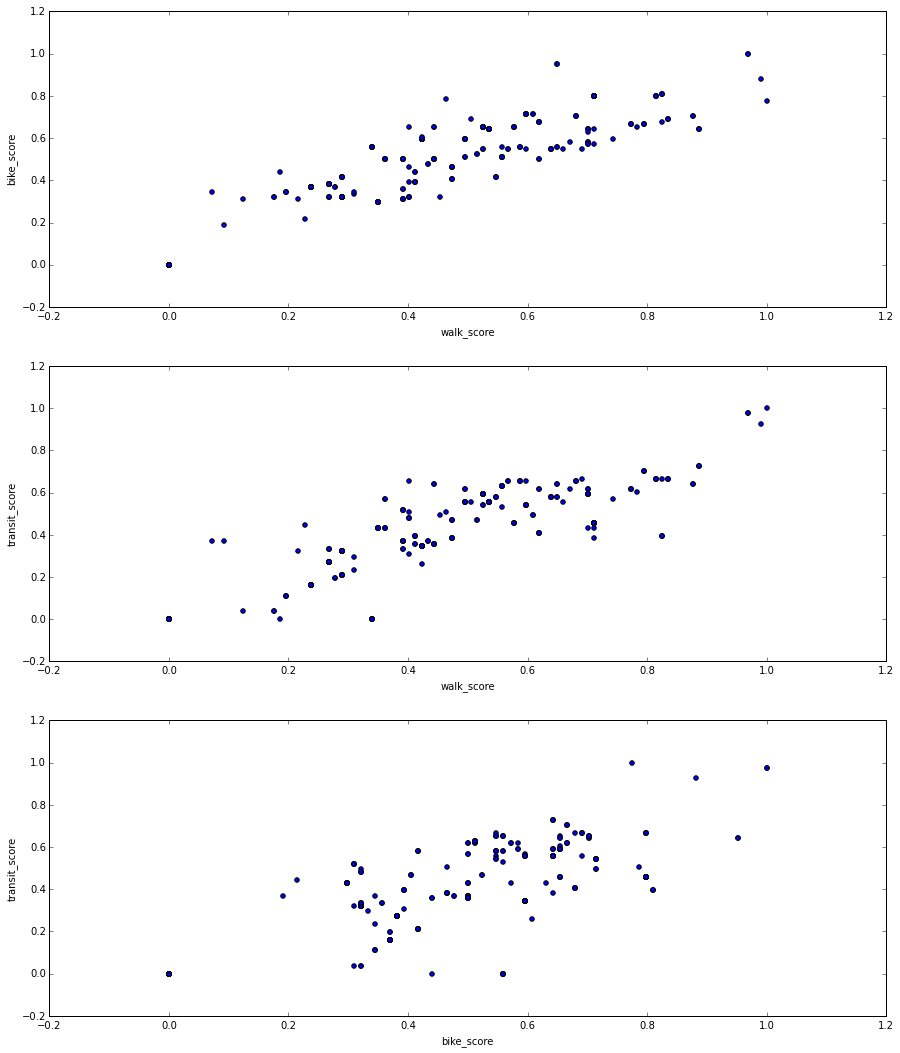

In [9]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='walk_score', y='bike_score', ax=axs[0], figsize=(15, 18))
print pearsonr(features.walk_score,features.bike_score)
features.plot(kind='scatter', x='walk_score', y='transit_score', ax=axs[1])
print pearsonr(features.walk_score,features.transit_score)
features.plot(kind='scatter', x='bike_score', y='transit_score', ax=axs[2])
print pearsonr(features.bike_score,features.transit_score)

## See if individual features are correlated w/ labels

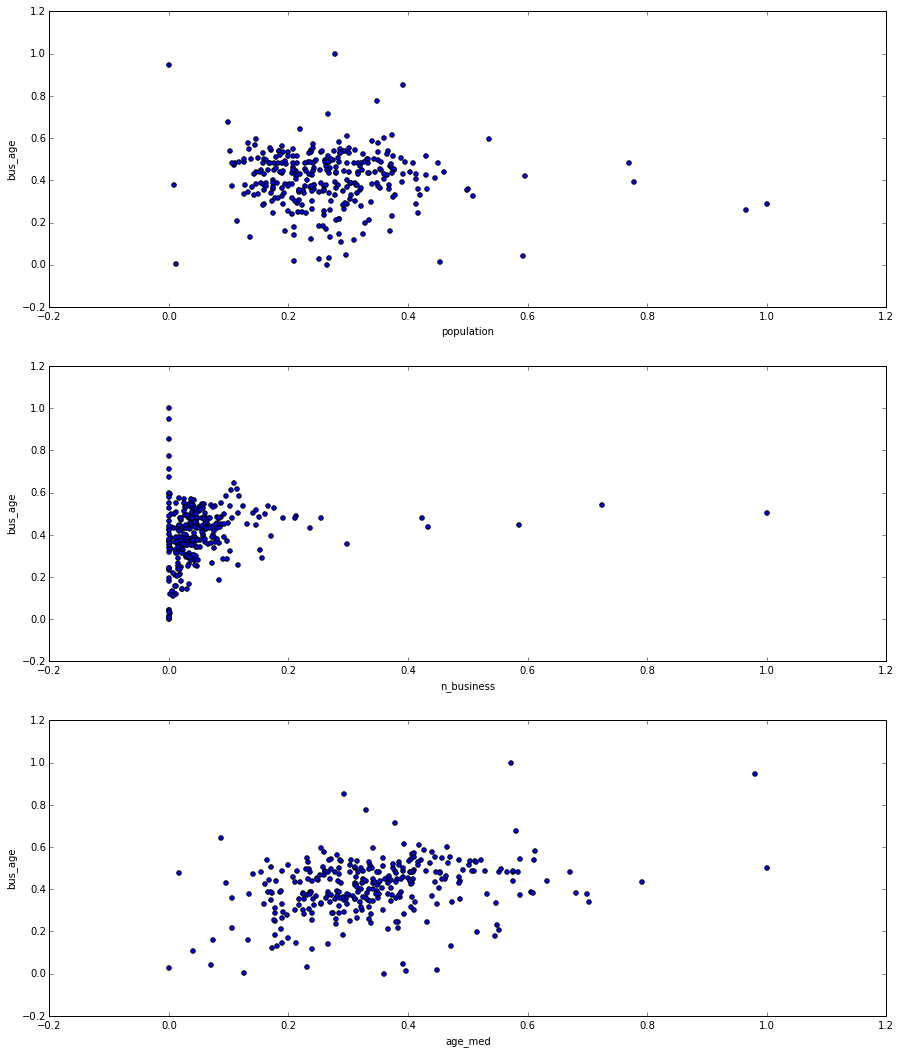

In [10]:
# plot features vs. score
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='population', y='bus_age', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='n_business', y='bus_age', ax=axs[1])
features.plot(kind='scatter', x='age_med', y='bus_age', ax=axs[2])

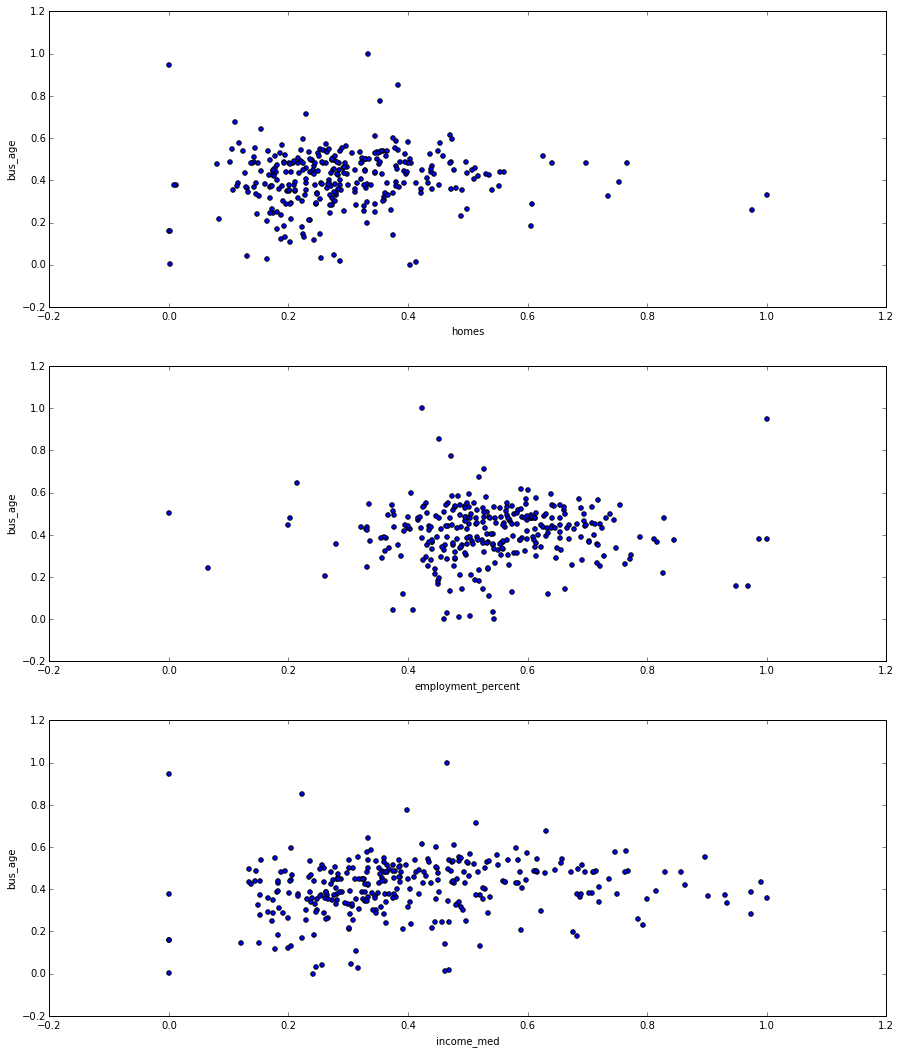

In [11]:
# plot features vs. score
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='homes', y='bus_age', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='employment_percent', y='bus_age', ax=axs[1])
features.plot(kind='scatter', x='income_med', y='bus_age', ax=axs[2])

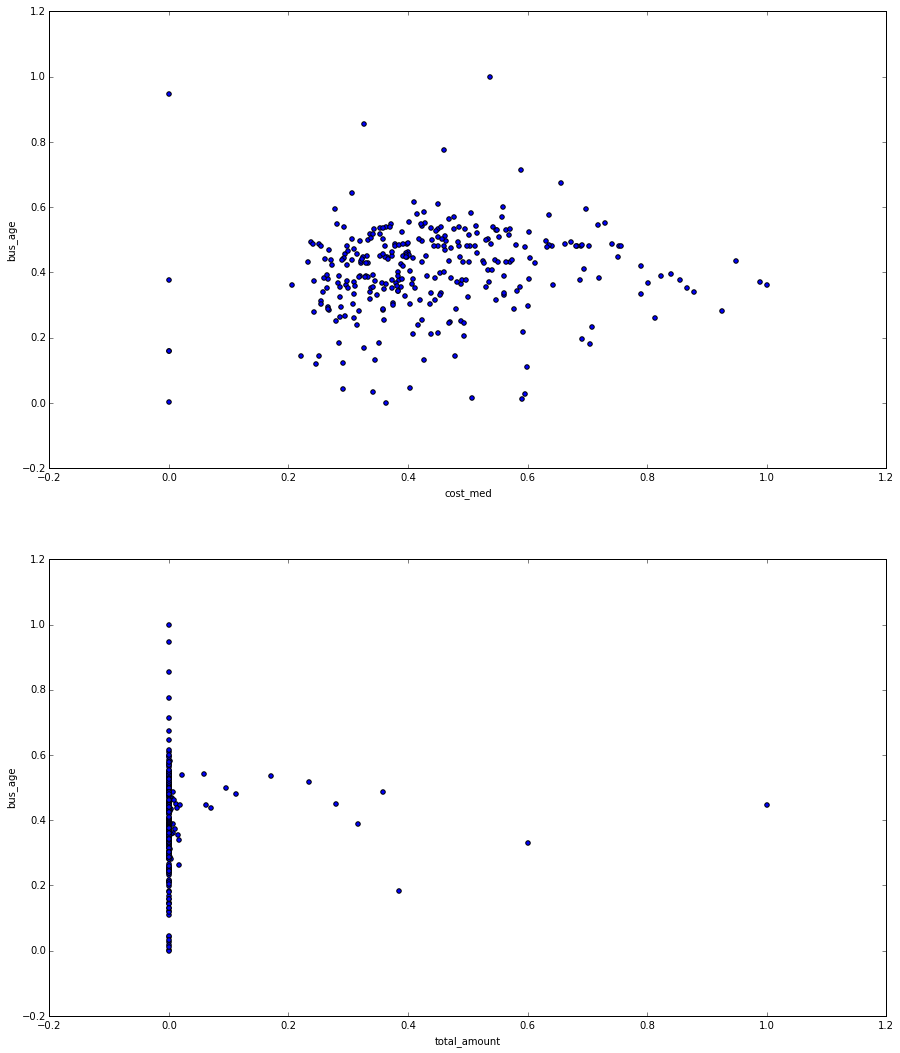

In [12]:
# plot features vs. score
fig, axs = plt.subplots(2,1, sharey=True)
features.plot(kind='scatter', x='cost_med', y='bus_age', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='total_amount', y='bus_age', ax=axs[1])